In [2]:
import scipy.stats
import sys
import os

sys.path.append("../soundsig")

In [3]:
from scipy import stats
import scipy.stats
from coherence2 import multitapered_coherence
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt


In [4]:
fs = 10e3
N = 1e5
amp = 20
freq = 1234.0
noise_power = 0.01 * fs / 2
time = np.arange(N) / fs
delay = int(0.006 * fs)
b, a = signal.butter(2, 0.25, 'low')
x = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)

beep = np.zeros_like(x)
beep[delay:] = x[:-delay]

y = signal.lfilter(b, a, beep)
y += np.random.normal(scale=0.1*np.sqrt(noise_power), size=time.shape)

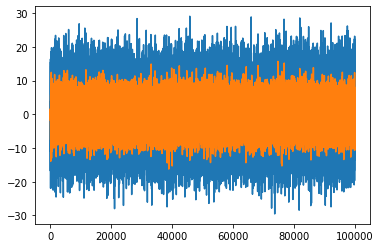

In [5]:
plt.plot(x)
plt.plot(y)

In [6]:
result = multitapered_coherence([
    np.array([x, y]),
], sampling_rate=fs)

/Users/frederictheunissen/anaconda3/lib/python3.7/site-packages/nitime/utils.py:980: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, np.complex) or
/Users/frederictheunissen/anaconda3/lib/python3.7/site-packages/nitime/utils.py:981: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, np.complex))
../soundsig/coherence2.py:244: RuntimeWarning: divide by zero encountered in arctanh
  est_sqrt_coherence = np.arctanh(np.abs(est_coherency))
../soundsig/coherence2.py:264: RuntimeWarning: divide by zero encountered in arctanh
  for x in cross_spectra_jn


In [12]:
result.keys()

dict_keys(['t', 'freqs', 'coherency', 'coherency_t', 'coherence', 'coherence_bounds'])

(0, 5000.0)

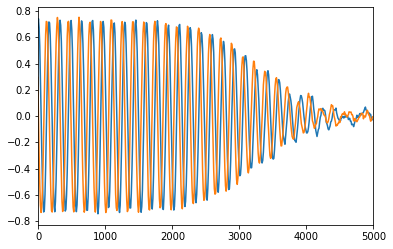

In [13]:
plt.plot(np.fft.fftshift(result["freqs"]), np.fft.fftshift(np.real(result["coherency"][0, 1])))
plt.plot(np.fft.fftshift(result["freqs"]), np.fft.fftshift(np.imag(result["coherency"][0, 1])))
plt.xlim(0, fs / 2)

(0, 5000.0)

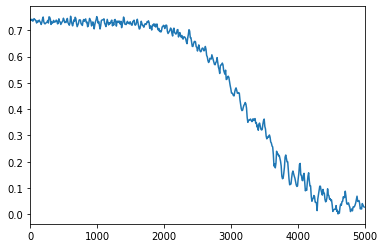

In [16]:
plt.plot(np.fft.fftshift(result["freqs"]), np.fft.fftshift(np.abs(result["coherency"][0, 1])))
plt.xlim(0, fs / 2)

(0, 5000.0)

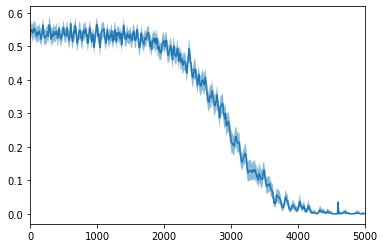

In [17]:
plt.plot(np.fft.fftshift(result["freqs"]), np.fft.fftshift(np.abs(result["coherence"][0, 1])))

plt.fill_between(
    np.fft.fftshift(result["freqs"]),
    np.fft.fftshift(np.abs(result["coherence_bounds"][0][0, 1])),
    np.fft.fftshift(np.abs(result["coherence_bounds"][1][0, 1])),
    alpha=0.5,
)

plt.xlim(0, fs / 2)

(0, 0.01)

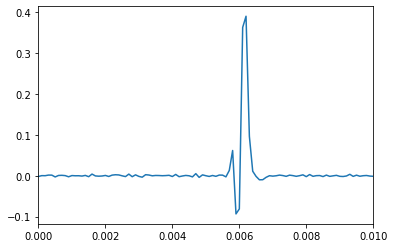

In [18]:
plt.plot(result["t"], np.real(result["coherency_t"][0, 1]))
plt.xlim(0, 0.01)
# plt.xlim(0, 0.07)
# plt.xlim(0, fs / 2)

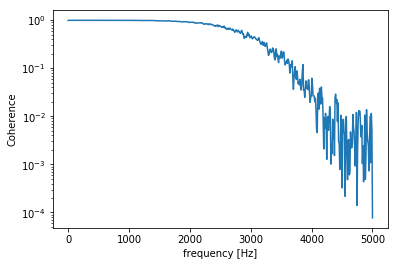

In [44]:
f, Cxy = signal.coherence(x, y, fs, nperseg=1024)
plt.semilogy(f, Cxy)
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')
plt.show()

In [4]:
(N_CHUNKS, N_CHANNELS, N_TAPERS, N_FREQS)


NameError: name 'N_CHUNKS' is not defined

In [5]:
 (N_CHUNKS, N_CHANNELS, N_CHANNELS, N_TAPERS, N_FREQS)

NameError: name 'N_CHUNKS' is not defined

In [1]:
import numpy as np
a = np.zeros((2, 4, 5, 6), dtype=complex)


a[0, 0, 0, :] = [1 + 1j, 1 - 1j, 0, 0, 1, 1j]

a[0, 1, 0, :] = [1, 2, 1, 1, 1, 1]

In [2]:
from kevin import cross_spectra, EXTREME_CROSS_SPECTRA

In [3]:
test_out = cross_spectra(a)

In [5]:
test_out2 = EXTREME_CROSS_SPECTRA(a)

In [11]:
test_out[0, 0, 1, 0, :]

array([ 1.-1.j,  2.+2.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.-1.j])

In [6]:
test_out2

array([[[[[ 2.+0.j,  2.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  1.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]],

         [[ 1.-1.j,  2.+2.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.-1.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]],

         [[ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]],

    

In [12]:
test_out[0, 1, 0, 0, :]

array([ 1.+1.j,  2.-2.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+1.j])

In [13]:
test_out[0, 1, 1, 0, :]

array([ 1.+0.j,  4.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j])

In [14]:
def cross_spectra2(a, b):
    return np.conj(a[:, :, np.newaxis, :, :], b[:, np.newaxis, :, :, :])

In [17]:
test_out = cross_spectra2(a, a)

ValueError: non-broadcastable output operand with shape (2,1,4,5,6) doesn't match the broadcast shape (2,4,4,5,6)

In [19]:
a[:, :, np.newaxis, :, :].shape

(2, 4, 1, 5, 6)

In [20]:
a[:, np.newaxis, :, :, :].shape

(2, 1, 4, 5, 6)

In [21]:
a.outer(a)


AttributeError: 'numpy.ndarray' object has no attribute 'outer'

In [22]:
a.shape

(2, 4, 5, 6)

In [28]:
np.outer(a.swapaxes(0, 1).conj(), a.swapaxes(0, 1)).reshape(4, 4, 2, 5, 6)

ValueError: cannot reshape array of size 57600 into shape (4,4,2,5,6)

In [29]:
a.swapaxes(0, 1).conj().shape

(4, 2, 5, 6)

In [ ]:
def chunk(x, window_size=1024, overlap=0.5):
    '''
    sample_rate: the sample rate in Hz of signal
    window_size: size of the segments in seconds
    nOverlap = overlap between successive windows (default is WinLength/2)
    
    test parameter: 
    window_size = 1
    sample_rate = 50
    
    input size: [(nchannels, time), (), ()]
    output size: (N_CHUNKS, N_CHANNELS, chunk_size)
    '''

    nOverlap = int(window_size * overlap)
    nchannel, t = x.shape
    winstep = int(int(window_size) - nOverlap)
    
    # compute the length of each chunk
    nchunks = int(((t - window_size)/ winstep))
    nleft = (t - window_size)% winstep
    if nleft > 0:
        nchunks += 1
        
    ## chunk data 
    x_chunk = np.stack([x[:,i:i + window_size] for i in range(0, t, window_size-nOverlap)])

#     print('sample_length_bins=%d, # of chunks:%d, # samples in last chunk: %d' % (sample_length_bins, nchunks, nleft))
    
    return x_chunk


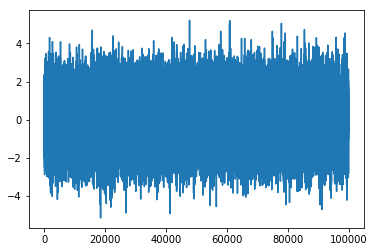

In [3]:
plt.plot(y)

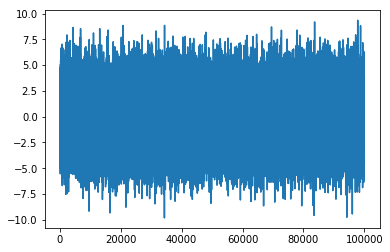

In [4]:
plt.plot(x)

In [5]:
multitapered_coherence([
    np.array([x, y])
])

ValueError: could not broadcast input array from shape (2,1024) into shape (2)

In [6]:
%debug

> /auto/fhome/kevin/Projects/soundsig/notebooks/coherence.py(61)chunk()
     59 
     60     output = np.array([
---> 61         X[:, i:i + window_size] for i in range(0, n_samples, window_step)
     62     ])
     63 

ipdb> X.shape
(2, 100352)
ipdb> output
*** NameError: name 'output' is not defined
ipdb> X[:, i:i + window_size]
*** NameError: name 'i' is not defined
ipdb> X[:, 0:window_size]
array([[ 2.18112942, -0.95250732,  0.14668368, ...,  1.72657148,
         0.82220527, -1.58029649],
       [ 0.46044306,  0.7545058 ,  0.0508624 , ..., -0.70841174,
         0.82124477,  1.14993138]])
ipdb> X[:, 0:window_size].shape
(2, 1024)
ipdb> X[:, n_samples - window_step:n_samples - window_step + window_step]
array([[ 1.31672054,  1.50617551,  3.34482296, ..., -4.72451245,
         0.37453512, -3.22201226],
       [ 3.04194992,  3.32884102,  3.48115132, ...,  0.8480149 ,
         0.32842719, -1.05578732]])
ipdb> X[:, n_samples - window_step:n_samples - window_step + window_step].shape
(2, 